### Problem Statement
- Past years have experienced an increasing mortality rate due to lung cancer and thus it becomes crucial to predict whether the tumor has transformed to cancer or not, if the prediction is made at an early stage then many lives can be saved and accurate prediction also can help the doctors start their treatment. In this project, we have proposed a framework for prediction of cancer at an early stage so that many lives that are in endangered situation could be revived.

In [1]:
# Importing the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

### Reading Data

In [2]:
data = pd.read_csv("LungCancerdata.csv")
data

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,points_worst,symmetry_worst,dimension_worst
0,87139402,B,12.32,12.39,78.85,464.1,0.10280,0.06981,0.03987,0.03700,...,13.50,15.64,86.97,549.1,0.1385,0.1266,0.12420,0.09391,0.2827,0.06771
1,8910251,B,10.60,18.95,69.28,346.4,0.09688,0.11470,0.06387,0.02642,...,11.88,22.94,78.28,424.8,0.1213,0.2515,0.19160,0.07926,0.2940,0.07587
2,905520,B,11.04,16.83,70.92,373.2,0.10770,0.07804,0.03046,0.02480,...,12.41,26.44,79.93,471.4,0.1369,0.1482,0.10670,0.07431,0.2998,0.07881
3,868871,B,11.28,13.39,73.00,384.8,0.11640,0.11360,0.04635,0.04796,...,11.92,15.77,76.53,434.0,0.1367,0.1822,0.08669,0.08611,0.2102,0.06784
4,9012568,B,15.19,13.21,97.65,711.8,0.07963,0.06934,0.03393,0.02657,...,16.20,15.73,104.50,819.1,0.1126,0.1737,0.13620,0.08178,0.2487,0.06766
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,911320502,B,13.17,18.22,84.28,537.3,0.07466,0.05994,0.04859,0.02870,...,14.90,23.89,95.10,687.6,0.1282,0.1965,0.18760,0.10450,0.2235,0.06925
565,898677,B,10.26,14.71,66.20,321.6,0.09882,0.09159,0.03581,0.02037,...,10.88,19.48,70.89,357.1,0.1360,0.1636,0.07162,0.04074,0.2434,0.08488
566,873885,M,15.28,22.41,98.92,710.6,0.09057,0.10520,0.05375,0.03263,...,17.80,28.03,113.80,973.1,0.1301,0.3299,0.36300,0.12260,0.3175,0.09772
567,911201,B,14.53,13.98,93.86,644.2,0.10990,0.09242,0.06895,0.06495,...,15.80,16.93,103.10,749.9,0.1347,0.1478,0.13730,0.10690,0.2606,0.07810


In [3]:
data.shape

(569, 32)

### Checking Null values in Data

In [5]:
data.isnull().sum()

id                   0
diagnosis            0
radius_mean          0
texture_mean         0
perimeter_mean       0
area_mean            0
smoothness_mean      0
compactness_mean     0
concavity_mean       0
points_mean          0
symmetry_mean        0
dimension_mean       0
radius_se            0
texture_se           0
perimeter_se         0
area_se              0
smoothness_se        0
compactness_se       0
concavity_se         0
points_se            0
symmetry_se          0
dimension_se         0
radius_worst         0
texture_worst        0
perimeter_worst      0
area_worst           0
smoothness_worst     0
compactness_worst    0
concavity_worst      0
points_worst         0
symmetry_worst       0
dimension_worst      0
dtype: int64

### Displaying coloumns in Data

In [6]:
data.columns

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'points_mean', 'symmetry_mean', 'dimension_mean', 'radius_se',
       'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'points_se', 'symmetry_se',
       'dimension_se', 'radius_worst', 'texture_worst', 'perimeter_worst',
       'area_worst', 'smoothness_worst', 'compactness_worst',
       'concavity_worst', 'points_worst', 'symmetry_worst', 'dimension_worst'],
      dtype='object')

In [7]:
data.describe()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,points_worst,symmetry_worst,dimension_worst
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


### Data Visualization

In [8]:
# importing packages related to visualization
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [9]:
# Packages versions
print("pandas version",pd.__version__)
print("numpy version",np.__version__)
print("matplotlib version",matplotlib.__version__)
print("seaborn version",sns.__version__)

pandas version 1.0.1
numpy version 1.18.1
matplotlib version 3.1.3
seaborn version 0.10.0


In [10]:
data.corr()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,points_worst,symmetry_worst,dimension_worst
id,1.000000,0.074626,0.099770,0.073159,0.096893,-0.012968,0.000096,0.050080,0.044158,-0.022114,...,0.082405,0.064720,0.079986,0.107187,0.010338,-0.002968,0.023203,0.035174,-0.044224,-0.029866
radius_mean,0.074626,1.000000,0.323782,0.997855,0.987357,0.170581,0.506124,0.676764,0.822529,0.147741,...,0.969539,0.297008,0.965137,0.941082,0.119616,0.413463,0.526911,0.744214,0.163953,0.007066
texture_mean,0.099770,0.323782,1.000000,0.329533,0.321086,-0.023389,0.236702,0.302418,0.293464,0.071401,...,0.352573,0.912045,0.358040,0.343546,0.077503,0.277830,0.301025,0.295316,0.105008,0.119205
perimeter_mean,0.073159,0.997855,0.329533,1.000000,0.986507,0.207278,0.556936,0.716136,0.850977,0.183027,...,0.969476,0.303038,0.970387,0.941550,0.150549,0.455774,0.563879,0.771241,0.189115,0.051019
area_mean,0.096893,0.987357,0.321086,0.986507,1.000000,0.177028,0.498502,0.685983,0.823269,0.151293,...,0.962746,0.287489,0.959120,0.959213,0.123523,0.390410,0.512606,0.722017,0.143570,0.003738
smoothness_mean,-0.012968,0.170581,-0.023389,0.207278,0.177028,1.000000,0.659123,0.521984,0.553695,0.557775,...,0.213120,0.036072,0.238853,0.206718,0.805324,0.472468,0.434926,0.503053,0.394309,0.499316
compactness_mean,0.000096,0.506124,0.236702,0.556936,0.498502,0.659123,1.000000,0.883121,0.831135,0.602641,...,0.535315,0.248133,0.590210,0.509604,0.565541,0.865809,0.816275,0.815573,0.510223,0.687382
concavity_mean,0.050080,0.676764,0.302418,0.716136,0.685983,0.521984,0.883121,1.000000,0.921391,0.500667,...,0.688236,0.299879,0.729565,0.675987,0.448822,0.754968,0.884103,0.861323,0.409464,0.514930
points_mean,0.044158,0.822529,0.293464,0.850977,0.823269,0.553695,0.831135,0.921391,1.000000,0.462497,...,0.830318,0.292752,0.855923,0.809630,0.452753,0.667454,0.752399,0.910155,0.375744,0.368661
symmetry_mean,-0.022114,0.147741,0.071401,0.183027,0.151293,0.557775,0.602641,0.500667,0.462497,1.000000,...,0.185728,0.090651,0.219169,0.177193,0.426675,0.473200,0.433721,0.430297,0.699826,0.438413


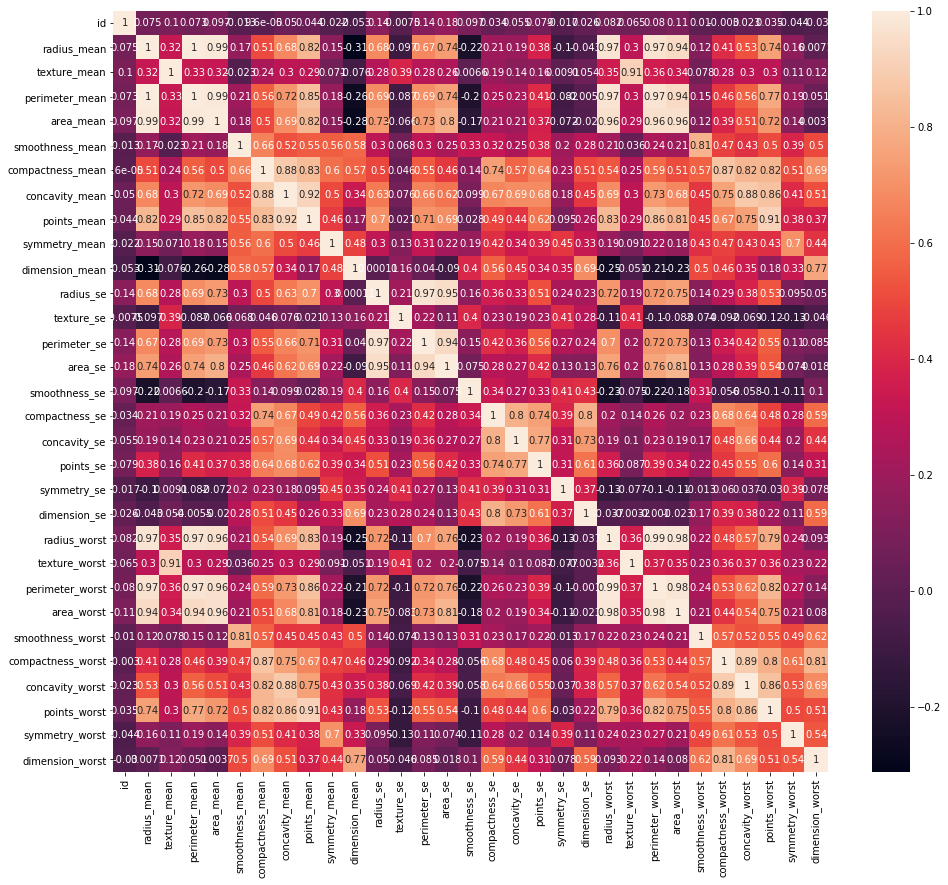

In [11]:
# displaying the heatmap for correlation
plt.figure(figsize=(16,14))
sns.heatmap(data.corr(),annot=True)

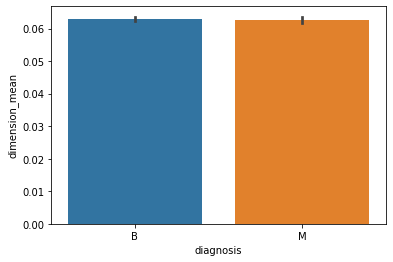

In [12]:
sns.barplot(x="diagnosis", y="dimension_mean", data=data)

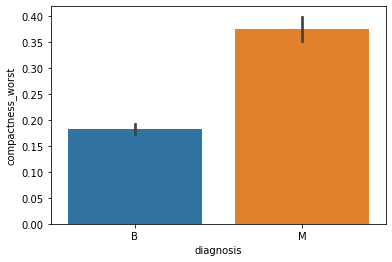

In [13]:
sns.barplot(x="diagnosis", y="compactness_worst", data=data)

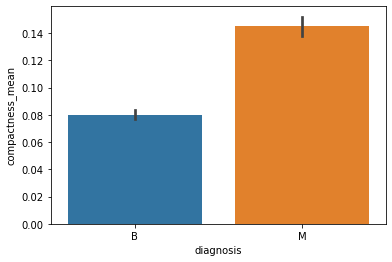

In [14]:
sns.barplot(x="diagnosis", y="compactness_mean", data=data)

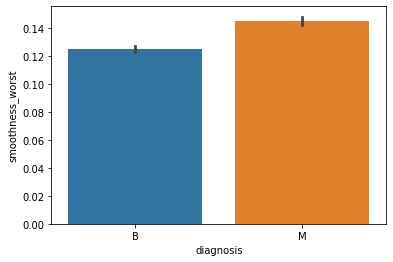

In [15]:
sns.barplot(x="diagnosis", y="smoothness_worst", data=data)

### Data Splitting

In [16]:
# Split the dataset into input and output--> Train and test
# Train--> Building the model
# Test--> How well the model has learnt(Generaize on unseen data)

In [17]:
# Preparing Input and Output
# Drop the id and diagnosis columns
X = data.drop(['id', 'diagnosis'], axis=1)
X.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,points_mean,symmetry_mean,dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,points_worst,symmetry_worst,dimension_worst
0,12.32,12.39,78.85,464.1,0.10280,0.06981,0.03987,0.03700,0.1959,0.05955,...,13.50,15.64,86.97,549.1,0.1385,0.1266,0.12420,0.09391,0.2827,0.06771
1,10.60,18.95,69.28,346.4,0.09688,0.11470,0.06387,0.02642,0.1922,0.06491,...,11.88,22.94,78.28,424.8,0.1213,0.2515,0.19160,0.07926,0.2940,0.07587
2,11.04,16.83,70.92,373.2,0.10770,0.07804,0.03046,0.02480,0.1714,0.06340,...,12.41,26.44,79.93,471.4,0.1369,0.1482,0.10670,0.07431,0.2998,0.07881
3,11.28,13.39,73.00,384.8,0.11640,0.11360,0.04635,0.04796,0.1771,0.06072,...,11.92,15.77,76.53,434.0,0.1367,0.1822,0.08669,0.08611,0.2102,0.06784
4,15.19,13.21,97.65,711.8,0.07963,0.06934,0.03393,0.02657,0.1721,0.05544,...,16.20,15.73,104.50,819.1,0.1126,0.1737,0.13620,0.08178,0.2487,0.06766


In [18]:
# Accessing Output Column
y = data.diagnosis
y.head()

0    B
1    B
2    B
3    B
4    B
Name: diagnosis, dtype: object

In [19]:
# Preparing Training and Testing Data
# Storing 70% of the data(569 rows) into training and remaining 30% of the data into testing
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, 
                                                    random_state=10)

In [20]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)
X_train

(398, 30)
(171, 30)
(398,)
(171,)


,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,points_mean,symmetry_mean,dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,points_worst,symmetry_worst,dimension_worst
431,18.310,20.58,120.80,1052.0,0.10680,0.12480,0.15690,0.09451,0.1860,0.05941,...,21.860,26.20,142.20,1493.0,0.1492,0.2536,0.3759,0.15100,0.3074,0.07863
389,16.300,15.70,104.70,819.8,0.09427,0.06712,0.05526,0.04563,0.1711,0.05657,...,17.320,17.76,109.80,928.2,0.1354,0.1361,0.1947,0.13570,0.2300,0.07230
309,13.560,13.90,88.59,561.3,0.10510,0.11920,0.07860,0.04451,0.1962,0.06303,...,14.980,17.13,101.10,686.6,0.1376,0.2698,0.2577,0.09090,0.3065,0.08177
111,8.219,20.70,53.27,203.9,0.09405,0.13050,0.13210,0.02168,0.2222,0.08261,...,9.092,29.72,58.08,249.8,0.1630,0.4310,0.5381,0.07879,0.3322,0.14860
35,13.660,15.15,88.27,580.6,0.08268,0.07548,0.04249,0.02471,0.1792,0.05897,...,14.540,19.64,97.96,657.0,0.1275,0.3104,0.2569,0.10540,0.3387,0.09638
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
369,19.450,19.33,126.50,1169.0,0.10350,0.11880,0.13790,0.08591,0.1776,0.05647,...,25.700,24.57,163.10,1972.0,0.1497,0.3161,0.4317,0.19990,0.3379,0.08950
320,12.450,16.41,82.85,476.7,0.09514,0.15110,0.15440,0.04846,0.2082,0.07325,...,13.780,21.03,97.82,580.6,0.1175,0.4061,0.4896,0.13420,0.3231,0.10340
527,17.950,20.01,114.20,982.0,0.08402,0.06722,0.07293,0.05596,0.2129,0.05025,...,20.580,27.83,129.20,1261.0,0.1072,0.1202,0.2249,0.11850,0.4882,0.06111
125,11.460,18.16,73.59,403.1,0.08853,0.07694,0.03344,0.01502,0.1411,0.06243,...,12.680,21.61,82.69,489.8,0.1144,0.1789,0.1226,0.05509,0.2208,0.07638


- Note
- Before Splitting if you apply model building--> you are considering whole data.
- you are including test data also into training data

### Data Scaling

In [21]:
# Scaling Data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

# Scaling for training data
scaled_X_train = pd.DataFrame(scaler.fit_transform(X_train), columns = X_train.columns)
scaled_X_train

#Scaling for test data
#Testing the data based on training data
scaled_X_test = pd.DataFrame(scaler.transform(X_test), columns = X_test.columns)
scaled_X_test

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,points_mean,symmetry_mean,dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,points_worst,symmetry_worst,dimension_worst
0,-0.077524,0.385200,-0.028576,-0.181721,1.617086,1.210962,0.105416,0.353917,1.441699,1.621128,...,0.217083,0.452310,0.154687,0.075338,1.470507,0.755583,0.005892,0.674696,0.532371,1.661987
1,-0.644210,-0.376307,-0.630196,-0.629478,0.808428,-0.078482,-0.406623,-0.055776,-0.746101,0.554649,...,-0.541540,0.425511,-0.526524,-0.549443,0.146485,-0.400616,-0.607829,-0.159783,-0.649397,-0.331922
2,-0.392671,-0.471786,-0.431337,-0.427265,-0.688285,-0.898236,-0.696996,-0.630673,-0.010737,-0.617927,...,-0.362539,-0.550999,-0.430883,-0.402265,-0.391807,-0.613767,-0.364118,-0.197839,0.654169,-0.558780
3,-0.415801,-0.665074,-0.404851,-0.475219,1.400979,0.139137,-0.325629,-0.363643,0.516091,0.465086,...,-0.526623,-0.676622,-0.583600,-0.549987,1.149269,-0.465763,-0.363183,-0.417921,0.464889,-0.448273
4,-0.629754,-0.604526,-0.499866,-0.603191,0.933909,1.316231,1.011138,0.733116,3.205109,1.510897,...,-0.490396,0.157515,-0.421319,-0.478029,0.302763,1.014906,0.860048,1.146956,4.775544,1.019133
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
166,-0.913098,1.172324,-0.924489,-0.806559,-0.960859,-0.673919,-0.874780,-1.016766,0.636823,0.073768,...,-0.641695,1.006726,-0.669060,-0.634088,-0.482969,-0.540397,-0.957069,-1.204563,0.306881,-0.401520
167,-1.534429,-1.100553,-1.532835,-1.194808,-0.301385,-1.119109,-1.068863,-1.233148,-0.292443,0.619409,...,-1.444641,-1.406910,-1.457018,-1.080697,-0.665293,-1.126909,-1.246809,-1.703417,-0.461762,-0.283575
168,-0.112219,0.620406,-0.156383,-0.230541,-1.125379,-0.356773,-0.558329,-0.665145,-0.610735,-0.572457,...,-0.264515,0.770555,-0.244537,-0.351514,-1.346840,-0.479045,-0.567132,-0.757521,-0.702066,-0.721353
169,-0.005242,-0.495074,0.023136,-0.110946,0.968765,0.510448,0.158451,0.157954,0.388043,-0.199052,...,0.074308,-0.564399,0.077557,-0.053352,0.854077,0.489936,0.254280,0.396537,0.321694,-0.225665


### Model Building

- K Nearest Neighbours(KNN)
- Logistic Regression
- Decission Tree
- Random Forest Classifier
- SVM

### KNN

In [22]:
# Model Building:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=40, metric='euclidean')

# Apply the knn object on the dataset(Training Phase)
# Syntax: objectName.fit(Input, Output)
knn.fit(scaled_X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='euclidean',
                     metric_params=None, n_jobs=None, n_neighbors=40, p=2,
                     weights='uniform')

In [23]:
knn.score(scaled_X_train,y_train)

0.9472361809045227

In [24]:
y_train_pred=knn.predict(scaled_X_train)
y_train_pred

array(['M', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'M', 'B', 'B', 'B',
       'B', 'M', 'M', 'B', 'B', 'M', 'M', 'B', 'M', 'B', 'B', 'B', 'B',
       'B', 'B', 'B', 'M', 'M', 'M', 'M', 'B', 'B', 'B', 'B', 'B', 'B',
       'M', 'B', 'B', 'M', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B',
       'M', 'B', 'B', 'B', 'B', 'M', 'B', 'B', 'M', 'B', 'M', 'B', 'B',
       'M', 'B', 'B', 'M', 'M', 'B', 'B', 'B', 'M', 'M', 'M', 'B', 'M',
       'B', 'B', 'B', 'B', 'B', 'M', 'B', 'M', 'B', 'B', 'M', 'M', 'B',
       'B', 'M', 'B', 'M', 'M', 'M', 'B', 'B', 'B', 'B', 'B', 'B', 'B',
       'B', 'B', 'B', 'B', 'M', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B',
       'B', 'M', 'B', 'B', 'B', 'M', 'B', 'M', 'B', 'M', 'M', 'B', 'M',
       'B', 'M', 'B', 'M', 'B', 'B', 'B', 'B', 'M', 'B', 'B', 'B', 'M',
       'M', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'M', 'B', 'B', 'B',
       'M', 'B', 'M', 'B', 'M', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B',
       'M', 'M', 'B', 'M', 'M', 'M', 'B', 'B', 'B', 'B', 'B', 'B

In [26]:
import warnings
warnings.filterwarnings('ignore')

### Logistic Regression

In [27]:
from sklearn.linear_model import LogisticRegression
lm=LogisticRegression()
lm.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [28]:
lm.score(X_train,y_train)

0.9547738693467337

### Decision Tree

In [29]:
# importing decision tree algorithm from sklearn tree
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier() #assigning an object name
dtree.fit(X_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [30]:
dtree.score(X_train,y_train)

1.0

In [32]:
dtree.score(X_test,y_test)

0.9239766081871345

In [33]:
y_train_pred1=dtree.predict(X_train)
y_train_pred1

array(['M', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'M', 'B', 'B', 'B',
       'B', 'M', 'M', 'B', 'M', 'M', 'M', 'B', 'M', 'B', 'B', 'B', 'M',
       'B', 'B', 'B', 'M', 'M', 'M', 'M', 'M', 'B', 'B', 'B', 'B', 'B',
       'M', 'B', 'B', 'M', 'B', 'B', 'B', 'B', 'B', 'B', 'M', 'B', 'B',
       'M', 'B', 'B', 'B', 'M', 'M', 'B', 'B', 'M', 'B', 'M', 'B', 'B',
       'M', 'B', 'B', 'M', 'M', 'B', 'B', 'B', 'M', 'M', 'M', 'B', 'M',
       'B', 'B', 'B', 'B', 'B', 'M', 'B', 'M', 'B', 'B', 'M', 'M', 'B',
       'B', 'M', 'B', 'M', 'M', 'M', 'B', 'B', 'B', 'B', 'B', 'B', 'B',
       'B', 'B', 'B', 'B', 'M', 'B', 'B', 'B', 'M', 'B', 'B', 'B', 'B',
       'B', 'M', 'M', 'B', 'B', 'M', 'B', 'M', 'B', 'M', 'M', 'B', 'M',
       'B', 'M', 'B', 'M', 'B', 'B', 'B', 'B', 'M', 'B', 'B', 'B', 'M',
       'M', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'M', 'B', 'B', 'B',
       'M', 'B', 'M', 'B', 'M', 'M', 'B', 'B', 'B', 'M', 'B', 'B', 'B',
       'M', 'M', 'M', 'M', 'M', 'M', 'B', 'B', 'M', 'B', 'B', 'B

### Random Forest Classifier

In [34]:
# importing randmforest classifier from sklearn ensemble
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=200)
rfc.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=200,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [35]:
rfc.score(X_train,y_train)

1.0

In [36]:
rfc.score(X_test,y_test)

0.9649122807017544

### SVM

In [37]:
from sklearn.svm import SVC
svm=SVC()
svm.fit(X_train,y_train)


SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [38]:
svm.score(X_train,y_train)

0.9095477386934674

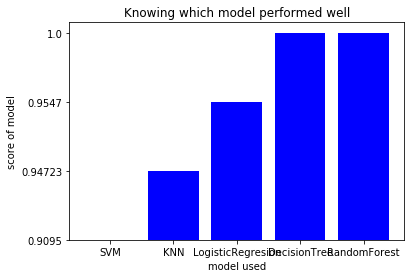

In [39]:
# Knowing which model has performed well
model=['SVM','KNN','LogisticRegresion','DecisionTree','RandomForest']
score=['0.9095','0.94723','0.9547','1.0','1.0']
plt.bar(model,score,color='blue')
plt.title('Knowing which model performed well')
plt.xlabel('model used')
plt.ylabel('score of model')
plt.show()

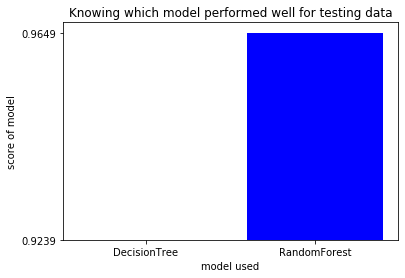

In [40]:
#Knowing which model has performed well for testing data
model=['DecisionTree','RandomForest']
score=['0.9239','0.9649']
plt.bar(model,score,color='blue')
plt.title('Knowing which model performed well for testing data')
plt.xlabel('model used')
plt.ylabel('score of model')
plt.show()

### Predicting the Diagnosis of Test Data

In [41]:
final_test_pred2=rfc.predict(X_test)
final_test_pred2

array(['M', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'M', 'B', 'B', 'M', 'M',
       'B', 'M', 'M', 'B', 'B', 'B', 'M', 'M', 'M', 'B', 'M', 'M', 'B',
       'B', 'M', 'B', 'M', 'B', 'B', 'M', 'M', 'B', 'B', 'B', 'B', 'B',
       'B', 'B', 'M', 'B', 'B', 'B', 'B', 'B', 'M', 'M', 'B', 'B', 'B',
       'B', 'B', 'M', 'M', 'M', 'B', 'M', 'B', 'B', 'M', 'B', 'M', 'M',
       'B', 'M', 'B', 'B', 'M', 'M', 'M', 'B', 'M', 'B', 'B', 'B', 'M',
       'M', 'B', 'M', 'M', 'B', 'B', 'B', 'M', 'M', 'B', 'M', 'B', 'B',
       'B', 'M', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'M', 'B', 'B', 'B',
       'B', 'M', 'B', 'M', 'M', 'M', 'M', 'B', 'B', 'M', 'B', 'M', 'B',
       'B', 'M', 'M', 'M', 'M', 'B', 'M', 'M', 'M', 'B', 'B', 'M', 'M',
       'B', 'B', 'B', 'M', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'M', 'M',
       'M', 'M', 'B', 'B', 'M', 'B', 'B', 'B', 'B', 'M', 'B', 'B', 'B',
       'M', 'M', 'M', 'M', 'B', 'M', 'M', 'M', 'M', 'B', 'B', 'B', 'B',
       'B', 'M'], dtype=object)

### Confusion Matrix
- It is a performance measurement for machine learning classification problem where output can be two or more classes. It is a table with 4 different combinations of predicted and actual values.


- TP / True Positive: when a case was positive and predicted positive
- FP / False Positive: when a case was negative but predicted positive
- FN / False Negative: when a case was positive but predicted negative
- TN / True Negative: when a case was negative and predicted negative

In [42]:
from sklearn.metrics import classification_report,confusion_matrix

In [43]:
pred = rfc.predict(X_test)

- Precision – What percent of your predictions were correct
- Recall – What percent of the positive cases did you catch
- F1 score – What percent of positive predictions were correct

In [44]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           B       0.96      0.98      0.97        98
           M       0.97      0.95      0.96        73

    accuracy                           0.96       171
   macro avg       0.97      0.96      0.96       171
weighted avg       0.97      0.96      0.96       171



In [45]:
matrix=confusion_matrix(y_test,pred)
print(matrix)

[[96  2]
 [ 4 69]]


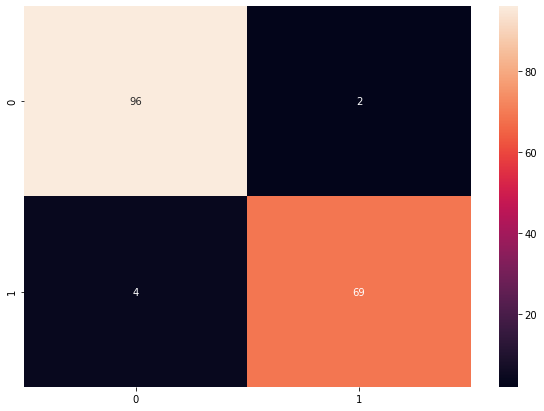

In [46]:
plt.figure(figsize = (10,7))
sns.heatmap(matrix,annot=True)

### Conclusion

- The proposed model shows the overview of prediction of lung cancer at an early stage. After prediction of the tumour begins malignant or benign, we calculate accuracy score for each machine learning technique .
- From the result we can say that our proposed model can distinguish between benign and malignant, and by comparing all the accuracy scores of machine learning techniques the best technique with highest accuracy score is selected i.e here Random Forest Classifier Algorithm has predicted well with a good accuracy for training data and testing data.